In [25]:
library(igraph)
library(MASS)
library(ggplot2)

plot_core = function(g, core) {
    vertex_size = rep(5, vcount(g))
    vertex_color = rep("blue", vcount(g))
    
    if(core > 0){
        vertex_color[g$names == core] = "red"
        vertex_size[g$names == core] = 10  
    }
    
    plot(g, vertex.size = vertex_size, vertex.color = vertex_color, vertex.label=NA)
}

plot_comm = function(g, f, core) {
    vertex_size = rep(5, vcount(g))
    vertex_color = rep("blue", vcount(g))
    
    if(core > 0){
        vertex_color[g$names == core] = "red"
        vertex_size[g$names == core] = 10  
    }
    
    comm = f(g)
    cat("Modularity:", modularity(comm), "\nCommunity Sizes", sizes(comm), "\n")
    plot(g, vertex.size = vertex_size , vertex.label = NA , vertex.color = comm$membership, layout=layout.fruchterman.reingold)
}

options(repr.plot.width=4, repr.plot.height=4)
colors = c("red", "yellow", "green", "violet", "orange", "blue", "pink", "cyan") 

# Part 1

### Download the Facebook graph edgelist file facebook_combined.txt

In [26]:
system("wget --directory-prefix=data http://snap.stanford.edu/data/facebook_combined.txt.gz")
system("gunzip -c data/facebook_combined.txt.gz > data/facebook_combined.txt")
system("rm data/facebook_combined.txt.gz")

g = read_graph("data/facebook_combined.txt", format="edgelist", directed=FALSE)

### Is the network connected?

In [27]:
is_connected(g)

[1] TRUE

### Measure the diameter of the network

In [28]:
diameter(g)

[1] 8

### Plot the degree distribution and...

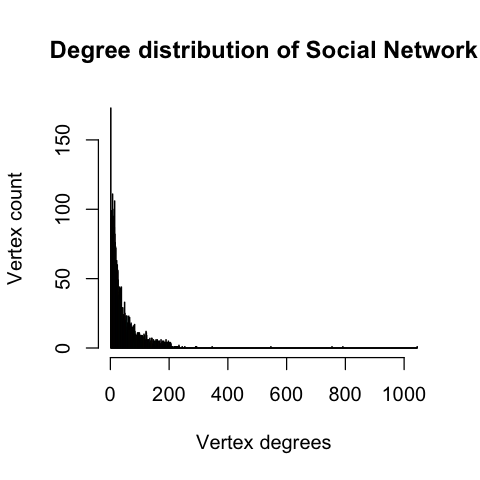

In [29]:
deg = degree(g)
h = hist(
    deg,
    breaks = seq(from = min(deg), to = max(deg), by=1),
    col=colors,
    main="Degree distribution of Social Network",
    xlab="Vertex degrees",
    ylab="Vertex count"
)

###  ...try to fit a curve on it

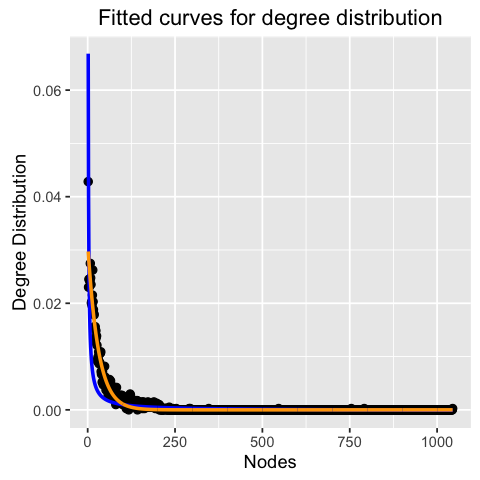

In [30]:
df = data.frame(x=h$mids, y=h$density)

# 1/(x^a) + bx
m1 = nls(y ~ (1/x*a) + b*x, data = df, start = list(a = 0, b = 0)) 

# e ^ (a + bx)
m2 = nls(y ~ (exp(1)^(a + b * x)), data=df, start = list(a=0,b=0))

ggplot(df, aes(x, y)) + 
    geom_point(size = 2) +
    geom_line(aes(x, fitted(m1)),size = 1,colour = "blue") + 
    geom_line(aes(x, fitted(m2)),size = 1,  colour = "orange")+
    ggtitle("Fitted curves for degree distribution")+ 
xlab("Nodes") +
ylab("Degree Distribution")

In [31]:
summary(m1)


Formula: y ~ (1/x * a) + b * x

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a  1.003e-01  2.251e-03  44.538   <2e-16 ***
b -1.616e-07  1.115e-07  -1.449    0.148    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.002172 on 1042 degrees of freedom

Number of iterations to convergence: 1 
Achieved convergence tolerance: 6.303e-08


In [32]:
summary(m2)


Formula: y ~ (exp(1)^(a + b * x))

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a -3.4661367  0.0088434 -391.95   <2e-16 ***
b -0.0331849  0.0004014  -82.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0007093 on 1042 degrees of freedom

Number of iterations to convergence: 17 
Achieved convergence tolerance: 1.622e-06


 ### What is the average degree?

In [33]:
mean(deg)

[1] 43.69101

# Part 2

### Take the first node in the graph (The node whose ID is 1) and find its neighbors.

In [34]:
nbors = neighborhood(g, 1, 1)[[1]]
nbors

+ 348/4039 vertices:
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
+ ... omitted several vertices

In [35]:
sg = induced_subgraph(g, nbors)
sg$names = sort(unlist(nbors))
cat("The induced subgraph has", vcount(sg), "vertices and", ecount(sg), "edges")

The induced subgraph has 348 vertices and 2866 edges

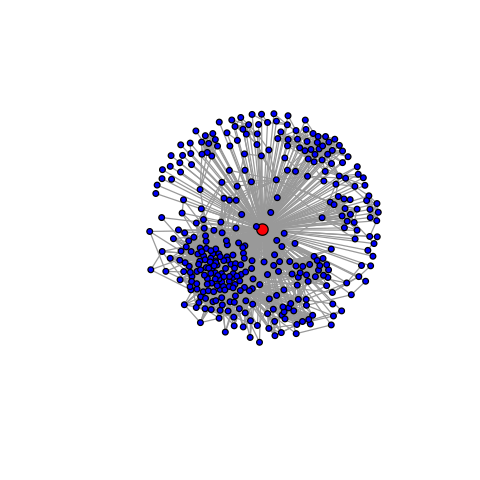

In [36]:
plot_core(sg, 1)

# Part 3

### Find nodes in the graph that have more than 200 neighbors

In [37]:
core_vertexes = which(deg > 200)
core_vertexes

[1]    1  108  349  484 1087 1200 1353 1432 1585 1590 1664 1685 1731 1747 1769
[16] 1801 1828 1889 1913 1942 1986 1994 2048 2079 2124 2143 2207 2219 2230 2234
[31] 2241 2267 2348 2411 2465 2508 2544 2561 2612 3438

###  How many core nodes do you find in the network?

In [38]:
length(core_vertexes)

[1] 40

### What is the average degree of these core nodes?

In [39]:
mean(deg[core_vertexes])

[1] 279.375

### For one of these nodes find the community structure of the core’s personal network.

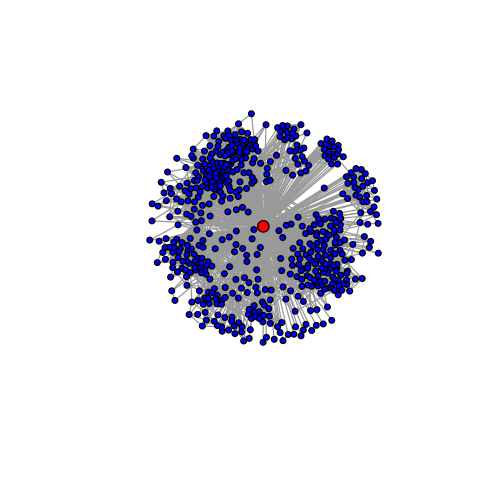

In [40]:
v = 3438
v_adj = sort(unlist(neighborhood(g, 1, v)))

pg = induced_subgraph(g, v_adj)
pg$names = sort(unlist(v_adj))

plot_core(pg, v)

### Fast-Greedy

Modularity: 0.5786093 
Community Sizes 20 137 208 42 19 39 76 7 


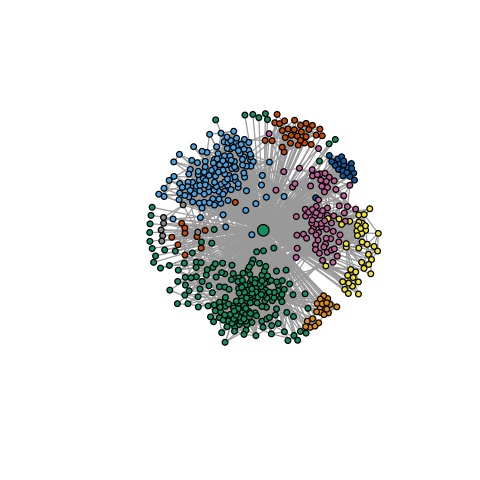

In [41]:
plot_comm(pg, fastgreedy.community, v)

### Edge-Betweenness

Modularity: 0.5863273 
Community Sizes 9 169 139 12 30 52 7 19 1 1 21 1 3 20 14 6 2 2 1 1 6 9 1 1 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 


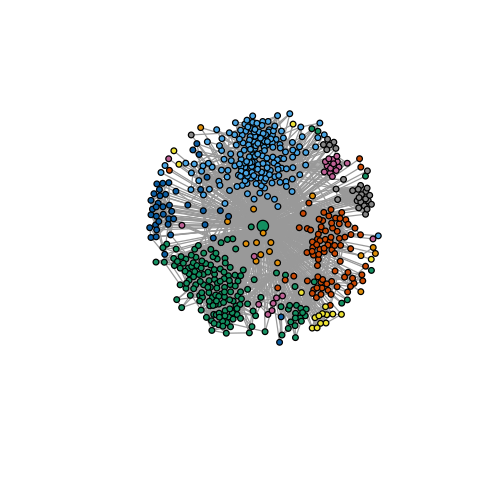

In [42]:
plot_comm(pg, edge.betweenness.community, v)

### Infomap community

Modularity: 0.5953552 
Community Sizes 147 100 52 20 27 29 21 19 19 24 14 12 10 9 7 6 5 4 4 3 3 3 2 2 2 2 2 


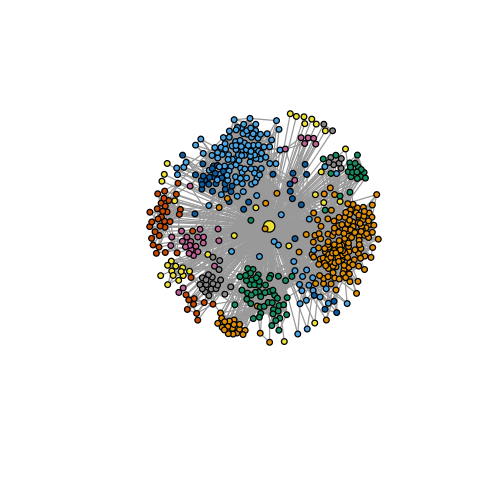

In [43]:
plot_comm(pg, infomap.community, v)

# Part 4

### Try removing the core node itself from its personal network ...

In [44]:
dpg = delete_vertices(pg, which(pg$names == v))

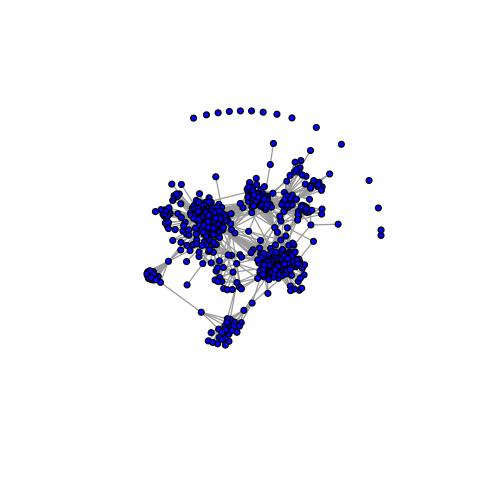

In [45]:
plot_core(dpg, 0)

### Fast Community

Modularity: 0.6549735 
Community Sizes 20 165 79 24 137 42 19 39 7 2 1 1 1 1 1 1 1 1 1 1 1 1 1 


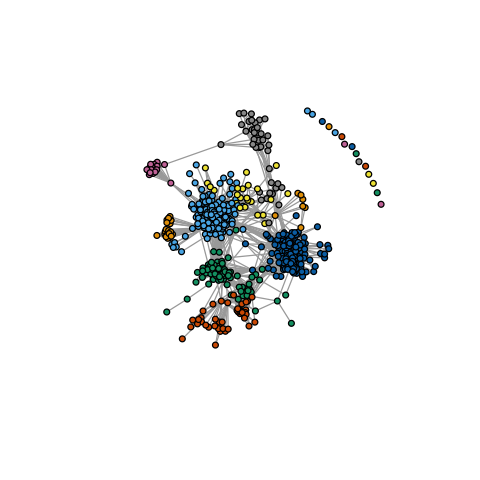

In [46]:
plot_comm(dpg, fastgreedy.community, 0)

Modularity: 0.6515693 
Community Sizes 10 169 41 29 53 138 7 19 1 1 1 3 23 14 6 2 2 1 1 6 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 


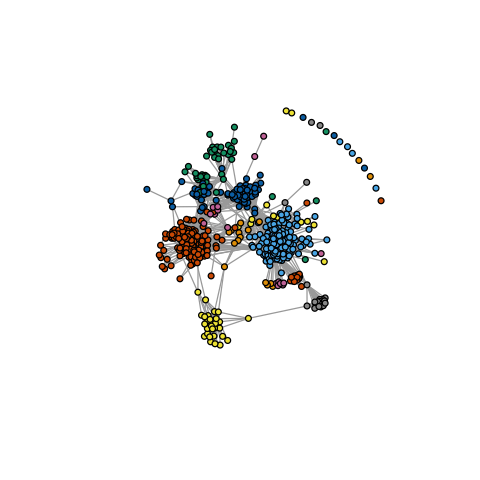

In [47]:
plot_comm(dpg, edge.betweenness.community, 0)

### Infomap community

Modularity: 0.6552117 
Community Sizes 150 101 52 27 29 21 19 19 24 14 12 10 9 7 6 5 4 2 4 3 3 3 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 


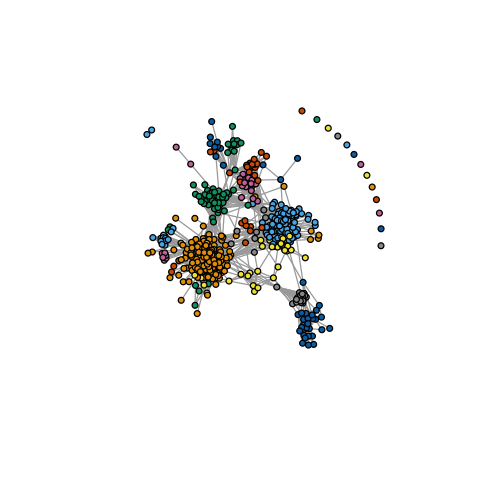

In [48]:
plot_comm(dpg, infomap.community, 0)